# Final Project Report

* Class: DS 5100
* Student Name: Jack Kenzakowski
* Student Net ID: jak5je
* This URL: https://github.com/jkenzak/ds5100-finalproject-jak5je/blob/main/DS51200_FinalProjectTemplate.ipynb

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/jkenzak/ds5100-finalproject-jak5je

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

```python
import numpy as np
import pandas as pd

class Die:
    ''' Initialize an N-sided die with weights that is meant to be rolled one or more times '''
    def __init__(self, faces):
        '''
        Creates the Die instance. Takes in an array of distnct die faces and initializes all their weights to 1
        
        INPUTS
        faces : NumPy array of strings, integers, or floats
        '''
        
        if type(faces) != np.ndarray:
            raise TypeError('Input must be a NumPy array')

        if len(np.unique(faces)) != len(faces):
            raise ValueError('The array\'s values must be distinct')

        weights = np.ones(len(faces))

        self._die_df = pd.DataFrame({
            'faces': faces,
            'weights': weights
        }).set_index('faces')

    def change_weight(self, face, new_weight):
        '''
        Changes the weight of a single side of the dice
        
        INPUTS
        face : string, integer, or float
            the face value to be changed, must be in the die darray
        new_weight : integer, float, or numeric string
            the new weight of the passed face on the die
        '''
        
        if face not in self._die_df.index:
            raise IndexError('Face passed must be a valid value')
        if type(new_weight) == str:
            if new_weight.isnumeric() == False:
                raise TypeError('String must be castable as numeric')
        elif type(new_weight) != int and type(new_weight) != float:
                raise TypeError('Value must be numeric or castable as numeric')
        else:
            self._die_df.loc[face] = new_weight

    def roll_die(self, n=1):
        '''
        Rolls the dice one or more times. Returns a list of the faces that the die rolled on
        
        INPUTS
        n : positive int
            number of times the die is to be rolled
            default: n=1
        
        OUTPUT
        list of die faces
        '''
        
        outcomes = []
        probs = self._die_df.weights / sum(self._die_df.weights)
        for i in range(n):
            outcome = np.random.choice(self._die_df.index.values, p = probs)
            outcomes.append(outcome)
        return outcomes


    def die_state(self):
        '''
        Show the die's current state, with each die face and their corresponding weights
        
        OUTPUT
        pandas dataframe
        '''
        
        return self._die_df.copy()
        

class Game:
    ''' Collection of dice with the purpose of rolling them and storing the results of the most recent play'''
    def __init__(self, dice):
        '''
        Game initializer
        
        INPUTS
        dice    list of Die objects
            All Die in the list have the same faces
        '''
        
        self.dice = dice

    def play(self, n):
        '''
       Rolls the dice a specified amount of times using the Die methods and stores them in a private dataframe
        
        INPUTS
        n : number of times to roll the dice
        '''
        
        result = pd.DataFrame()
        result.index.name = "roll_number"
        for i in range(0, len(self.dice)):
            result[i] = self.dice[i].roll_die(n)
        self._result = result

    def return_result(self, wide=True):
        '''
        Shows the results of the most recent play
        
        INPUTS
        wide : bool
            Whether the outputted dataframe should be in narrow or wide format
            Default: wide=True
        
        OUTPUT
        pandas dataframe of the roll results, in narrow or wide form
        '''
        
        if type(wide) != bool:
            raise ValueError('Must pass True or False for wide format')
        if wide == False:
            result_narrow = self._result.stack().to_frame('outcome')
            result_narrow.index.names = ['roll_number', 'die_number']
            return result_narrow.copy()
        return self._result.copy()
        
        
        
class Analyzer:
    ''' Takes the results of a Game object and computes properties and statistics of the game '''
    def __init__(self, game):
        '''
        Initializes Analyzer class
        
        INPUTS
        game    Game object
        '''
    
        if type(game) != Game:
            raise ValueError('Input must be a Game object')
        self.game = game
        
    def jackpot(self):
        '''
        Calculates number of instances where all faces are the same in a single roll, AKA a jackpot

        OUTPUT
        num_jackpot : int
        '''
        
        num_jackpot = 0
        results = self.game.return_result()
        for i in range(0, len(results)):
            result_row = results.iloc[i]
            if len(np.unique(result_row)) == 1:
                num_jackpot += 1
        return num_jackpot

    def face_counts(self):
        '''
        Computes how many times each face is rolled for each singular roll
        
        
        OUTPUT
        counts : pandas dataframe of counts for each roll
        '''
        results = self.game.return_result()
        faces = self.game.dice[0].die_state().index.values
        counts = pd.DataFrame(0, columns = faces, index = results.index)
        for i in range(0, len(results)):
            for j in results.columns:
                face_val = results.loc[i,j]
                counts.loc[(i, face_val)] += 1

        return counts

    def combo_count(self):
        '''
        Calculates the distinct combinations of faces rolled, in no particular order

        OUTPUT
        combos : pandas dataframe containing all of the combinations and their counts
        '''
        results = self.game.return_result()
        combinations = []
        for i in range(0, len(results)):
            permutation = results.iloc[i].sort_values()
            combinations.append(tuple(permutation))
        combos = pd.Series(combinations).value_counts().to_frame()
        index = pd.MultiIndex.from_tuples(combos.index.values)
        combos = combos.set_index(index)
        return combos

    def permutation_count(self):
        '''
        Calculates the distinct, order-dependent permutations of faces rolled

        OUTPUT
        perms : pandas dataframe containing all of the permutations and their counts
        '''
        results = self.game.return_result()
        combinations = []
        for i in range(0, len(results)):
            permutation = results.iloc[i]
            combinations.append(tuple(permutation))
        perms = pd.Series(combinations).value_counts().to_frame()
        index = pd.MultiIndex.from_tuples(perms.index.values)
        perms = perms.set_index(index)
        return perms
```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```python
from montecarlo.montecarlo import Die, Game, Analyzer
import unittest
import numpy as np
import pandas as pd

class TestDieMethods(unittest.TestCase):
    def test_Die_initializer(self):
        die1 = Die(np.array(['H', 'T']))
        self.assertTrue(type(die1) == Die)

    def test_change_weight(self):
        die1 = Die(np.array(['H', 'T']))
        die1.change_weight('H', 5)
        statement = die1._die_df.loc['H'].values
        self.assertEqual(statement, 5)

    def test_roll_die(self):
        die1 = Die(np.array(['H', 'T']))
        die_rolls = die1.roll_die(5)
        statement = (len(die_rolls) == 5) & (type(die_rolls) == list)
        self.assertTrue(statement)

    def test_die_state(self):
        die1 = Die(np.array(['H', 'T']))
        state = die1.die_state()
        self.assertEqual(type(state), pd.DataFrame)


class TestGameMethods(unittest.TestCase):
    def test_Game_initializer(self):
        die1 = Die(np.array(['H', 'T']))
        game1 = Game([die1, die1])
        self.assertEqual(type(game1), Game)

    def test_Game_roll(self):
        die1 = Die(np.array(['H', 'T']))
        game1 = Game([die1, die1])
        game1.play(10)
        self.assertEqual(len(game1._result), 10)

    def test_return_result(self):
        die1 = Die(np.array(['H', 'T']))
        game1 = Game([die1, die1])
        game1.play(10)
        result = game1.return_result(True)
        self.assertEqual(type(result), pd.DataFrame)

class TestAnalyzerMethods(unittest.TestCase):
    def test_Analyzer_initializer(self):
        die1 = Die(np.array(['H', 'T']))
        game1 = Game([die1, die1])
        game1.play(10)
        analysis = Analyzer(game1)
        self.assertEqual(type(analysis), Analyzer)
        
    def test_jackpot(self):
        die1 = Die(np.array(['H', 'T']))
        game1 = Game([die1, die1])
        game1.play(10)
        analysis = Analyzer(game1)
        self.assertEqual(type(analysis.jackpot()), int)
        
    def test_face_counts(self):
        die1 = Die(np.array(['H', 'T']))
        game1 = Game([die1, die1])
        game1.play(10)
        analysis = Analyzer(game1)
        self.assertEqual(type(analysis.face_counts()), pd.DataFrame)

    def test_combo_count(self):
        die1 = Die(np.array(['H', 'T']))
        game1 = Game([die1, die1])
        game1.play(10)
        analysis = Analyzer(game1)
        self.assertEqual(type(analysis.combo_count()), pd.DataFrame)

    def test_permutation_count(self):
        die1 = Die(np.array(['H', 'T']))
        game1 = Game([die1, die1])
        game1.play(10)
        analysis = Analyzer(game1)
        self.assertEqual(type(analysis.permutation_count()), pd.DataFrame)
        
   
if __name__ == '__main__':
    unittest.main(verbosity=2)
```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

```bash
test_Analyzer_initializer (__main__.TestAnalyzerMethods.test_Analyzer_initializer) ... ok
test_combo_count (__main__.TestAnalyzerMethods.test_combo_count) ... ok
test_face_counts (__main__.TestAnalyzerMethods.test_face_counts) ... ok
test_jackpot (__main__.TestAnalyzerMethods.test_jackpot) ... ok
test_permutation_count (__main__.TestAnalyzerMethods.test_permutation_count) ... ok
test_Die_initializer (__main__.TestDieMethods.test_Die_initializer) ... ok
test_change_weight (__main__.TestDieMethods.test_change_weight) ... ok
test_die_state (__main__.TestDieMethods.test_die_state) ... ok
test_roll_die (__main__.TestDieMethods.test_roll_die) ... ok
test_Game_initializer (__main__.TestGameMethods.test_Game_initializer) ... ok
test_Game_roll (__main__.TestGameMethods.test_Game_roll) ... ok
test_return_result (__main__.TestGameMethods.test_return_result) ... ok

----------------------------------------------------------------------
Ran 12 tests in 0.099s

OK
```

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [2]:
import montecarlo.montecarlo as montecarlo

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [3]:
help(montecarlo)

Help on module montecarlo.montecarlo in montecarlo:

NAME
    montecarlo.montecarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game

    class Analyzer(builtins.object)
     |  Analyzer(game)
     |
     |  Takes the results of a Game object and computes properties and statistics of the game
     |
     |  Methods defined here:
     |
     |  __init__(self, game)
     |      Initializes Analyzer class
     |
     |      INPUTS
     |      game    Game object
     |
     |  combo_count(self)
     |      Calculates the distinct combinations of faces rolled, in no particular order
     |
     |      OUTPUT
     |      combos : pandas dataframe containing all of the combinations and their counts
     |
     |  face_counts(self)
     |      Computes how many times each face is rolled for each singular roll
     |
     |
     |      OUTPUT
     |      counts : pandas dataframe of counts for each roll
     |
     |  jackpot(self)
     |      Calculates number of instanc

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL:

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

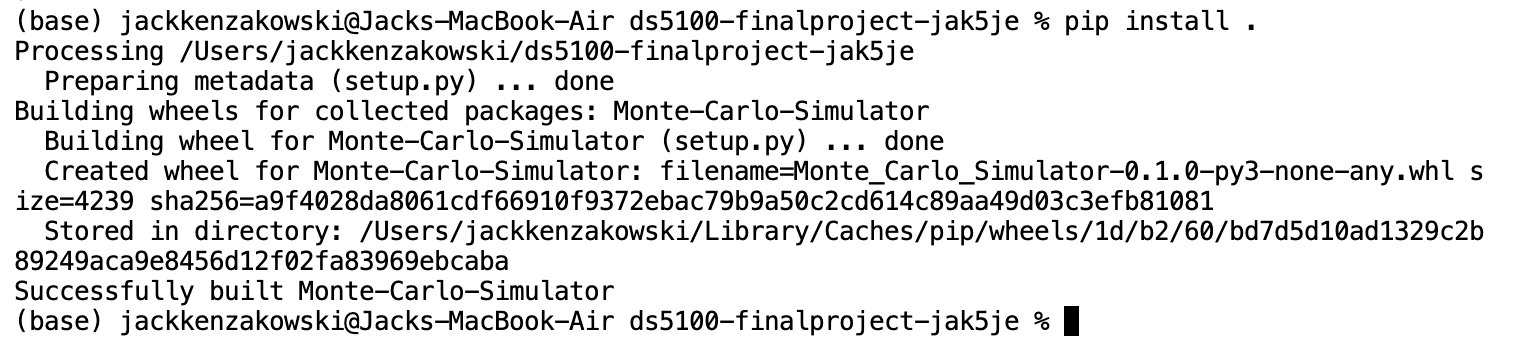

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [4]:
import numpy as np
import pandas as pd

fair_coin = montecarlo.Die(np.array(['H', 'T']))
unfair_coin = montecarlo.Die(np.array(['H', 'T']))
unfair_coin.change_weight('H', 5)

Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [5]:
coin_game = montecarlo.Game([fair_coin, fair_coin])
coin_game.play(1000)

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [6]:
coin_game2 = montecarlo.Game([unfair_coin, unfair_coin, fair_coin])
coin_game2.play(1000)

Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [7]:
analyzer1 = montecarlo.Analyzer(coin_game)
analyzer2 = montecarlo.Analyzer(coin_game2)
raw_jackpot1 = analyzer1.jackpot()
raw_jackpot2 = analyzer2.jackpot()
print('Game 1 raw jackpot frequency:', raw_jackpot1)
print('Game 2 raw jackpot frequency:', raw_jackpot2)

Game 1 raw jackpot frequency: 486
Game 2 raw jackpot frequency: 356


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [8]:
rel_jackpot1 = raw_jackpot1/1000
rel_jackpot2 = raw_jackpot2/1000
print('Game 1 relative jackpot frequency:', rel_jackpot1)
print('Game 2 relative jackpot frequency:', rel_jackpot2)

Game 1 relative jackpot frequency: 0.486
Game 2 relative jackpot frequency: 0.356


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

<Axes: xlabel='labels'>

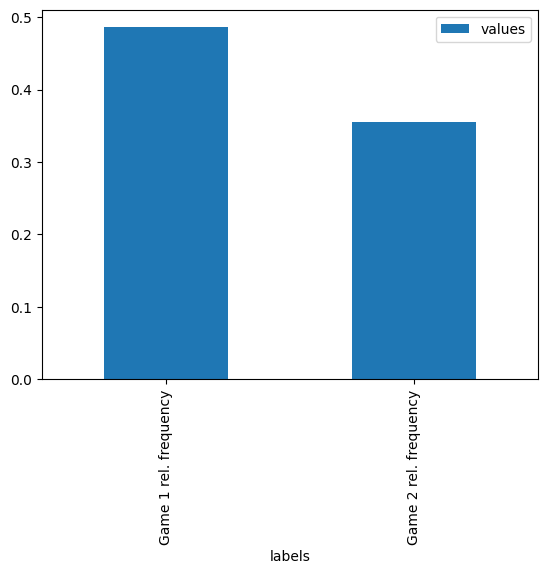

In [9]:
freqs = pd.DataFrame({'labels': ['Game 1 rel. frequency', 'Game 2 rel. frequency'],
                     'values': [rel_jackpot1, rel_jackpot2]})
freqs.plot.bar(x='labels', y='values')

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [10]:
die1 = montecarlo.Die(np.arange(1,7))
die2 = montecarlo.Die(np.arange(1,7))
die3 = montecarlo.Die(np.arange(1,7))

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [11]:
die1.change_weight(6, 5)

Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [12]:
die2.change_weight(1, 5)

Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [13]:
die_game = montecarlo.Game([die3] * 5)
die_game.play(10000)

Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [14]:
die_game2 = montecarlo.Game([die1, die2, die3, die3, die3])
die_game2.play(10000)

Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

<Axes: xlabel='labels'>

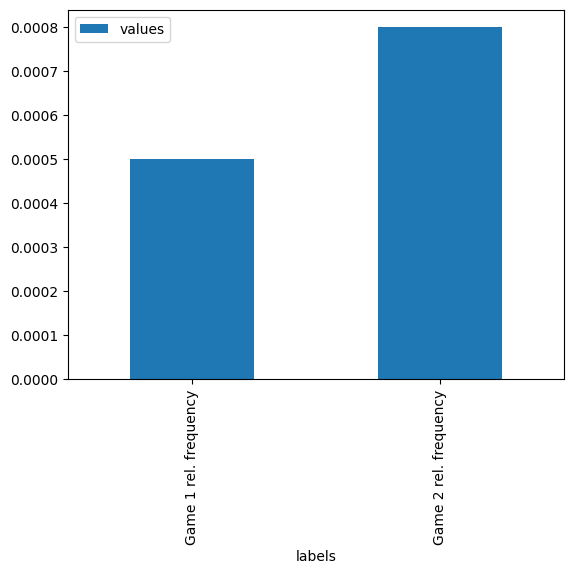

In [15]:
analyzer1 = montecarlo.Analyzer(die_game)
analyzer2 = montecarlo.Analyzer(die_game2)
rel_jackpot1 = analyzer1.jackpot() / 10000
rel_jackpot2 = analyzer2.jackpot() / 10000

freqs = pd.DataFrame({'labels': ['Game 1 rel. frequency', 'Game 2 rel. frequency'],
                     'values': [rel_jackpot1, rel_jackpot2]})
freqs.plot.bar(x='labels', y='values')

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [16]:
import pandas as pd
english_letters = pd.read_table('english_letters.txt', sep = ' ', header = None)
letters = np.array(english_letters[0])
die_letters = montecarlo.Die(letters)

for i in range(0, len(english_letters)):
    letter = english_letters.loc[i,0]
    weight = english_letters.loc[i,1]
    weight = float(weight)
    die_letters.change_weight(letter, weight)

Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [17]:
letters_game = montecarlo.Game([die_letters, die_letters, die_letters, die_letters])
letters_game.play(1000)

Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [18]:
letters_analysis = montecarlo.Analyzer(letters_game)
words = pd.read_table('scrabble_words.txt', header = None)
words_list = words[0]

counts = letters_analysis.permutation_count()
counts_full = []
for count in counts.index:
    counts_full.append(''.join(count))
    
counts.index = counts_full
counts_words = counts[counts.index.isin(words_list)]

total_words1 = sum(counts_words['count'])
print(total_words1, 'words')

50 words


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [19]:
letters_game = montecarlo.Game([die_letters, die_letters, die_letters,
                                die_letters, die_letters])
letters_game.play(1000)

letters_analysis = montecarlo.Analyzer(letters_game)

counts = letters_analysis.permutation_count()
counts_full = []
for count in counts.index:
    counts_full.append(''.join(count))
    
counts.index = counts_full
counts_words = counts[counts.index.isin(words_list)]

total_words2 = sum(counts_words['count'])
print(total_words2, "words")

if total_words1 > total_words2:
    print('4 dice creates more words')
elif total_words2 > total_words1:
    print('5 dice creates more words')
else:
    print('They produce the same number of words')

7 words
4 dice creates more words
